In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, 
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, 
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def imshow(img):
    img = img / 2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))

In [6]:
data_iter = iter(trainloader)
images, labels = next(data_iter)

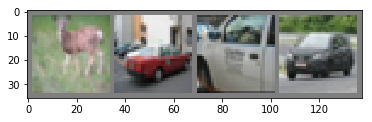

In [11]:
imshow(torchvision.utils.make_grid(images))

In [12]:
print(' '.join('%5s' % classes[labels[i]] for i in range(4)))

 deer   car   car   car


In [16]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [15]:
net = Net()

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [18]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finish Training')

[1,  2000] loss: 2.239
[1,  4000] loss: 1.918
[1,  6000] loss: 1.713
[1,  8000] loss: 1.639
[1, 10000] loss: 1.545
[1, 12000] loss: 1.504
[2,  2000] loss: 1.406
[2,  4000] loss: 1.357
[2,  6000] loss: 1.391
[2,  8000] loss: 1.328
[2, 10000] loss: 1.298
[2, 12000] loss: 1.287
Finish Training


Ground Truth:    cat  ship  ship plane


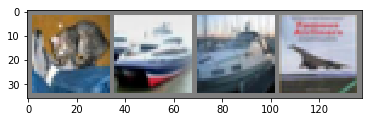

In [19]:
data_iter = iter(testloader)
images, labels = data_iter.next()

imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ', ' '.join('%5s' % classes[labels[i]] for i in range(4)))

In [20]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[i]] for i in range(4)))

Predicted:    cat plane  ship plane


In [27]:
outputs

tensor([[ 0.1833, -1.3027,  0.4342,  1.9700,  0.1204,  1.1427,  0.0720, -0.6857,
         -0.1647, -1.2038],
        [ 7.2996,  5.0376, -1.1646, -4.8064, -1.7514, -6.1226, -3.8589, -6.6565,
          6.3502,  3.9633],
        [ 3.0747,  2.2604, -0.9416, -1.8036, -1.2451, -2.8714, -2.7428, -2.0970,
          3.4635,  2.3529],
        [ 5.2971,  1.1703,  1.1318, -1.8597, -0.4292, -3.9661, -1.7703, -4.9143,
          3.9999,  0.1449]], grad_fn=<AddmmBackward>)

In [37]:
(predicted == labels)

tensor([0, 0, 0, 1], dtype=torch.uint8)

In [32]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [33]:
print('Accuracy of the network on test images: %d%%' % (100 * correct / total))

Accuracy of the network on test images: 55%


In [38]:
torch.cuda.is_available()

False